In [7]:
"""
BASELINE MODEL: RANDOM FOREST

This model uses only time features: Year, month, hour, weekday
"""


SyntaxError: EOL while scanning string literal (<ipython-input-7-4d6e85a2ab58>, line 1)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import matplotlib.pyplot as plt

In [4]:
data_train_small = pd.read_csv('../data/archive/train_data_small.csv').dropna()
data_test_small = pd.read_csv('../data/archive/test_data_small.csv').dropna()
data_train_small.head(3)

,collision,hour_cos,hour_sin,month_cos,month_sin,segment_id,sun_elevation_angle,prec_duration,prec_height,temperature,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,-0.576680,-0.816970,0.866025,0.5,6209.0,8.940090,3.506667,0.044000,5.94,...,0,1,0,0,0,0,0,0,0,0
1,1,-0.990686,0.136167,0.866025,0.5,41374.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.990686,0.136167,0.866025,0.5,41373.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_train_big = pd.read_csv('../data/archive/train_data_big.csv').dropna()
data_test_big = pd.read_csv('../data/archive/test_data_big.csv').dropna()
data_train_big.head(3)

,collision,hour_cos,hour_sin,month_cos,month_sin,segment_id,sun_elevation_angle,prec_duration,prec_height,temperature,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,-0.576680,-0.816970,0.866025,0.5,6209.0,8.940090,3.506667,0.044000,5.94,...,0,1,0,0,0,0,0,0,0,0
1,1,-0.990686,0.136167,0.866025,0.5,41374.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.990686,0.136167,0.866025,0.5,41373.0,14.868199,0.313333,0.000133,4.60,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_test_big.columns

Index(['collision', 'hour_cos', 'hour_sin', 'month_cos', 'month_sin',
       'segment_id', 'sun_elevation_angle', 'prec_duration', 'prec_height',
       'temperature', 'humidity', 'visibility', 'width', 'length',
       'collision_cnt', 'year_2018', 'year_2019', 'year_2020', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [7]:
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 70% training and 30% test
X_train_small = data_train_small[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
X_test_small = data_test_small[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
y_train_small = data_train_small['collision']
y_test_small = data_test_small['collision']

In [8]:
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 70% training and 30% test
X_train_big = data_train_big[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
X_test_big = data_test_big[['hour_cos', 'hour_sin', 'month_cos', 'month_sin','collision_cnt']]
y_train_big = data_train_big['collision']
y_test_big = data_test_big['collision']

In [17]:
#Create a Gaussian Classifier
clf_small=RandomForestClassifier(n_estimators=327, 
                                max_depth=45,
                                min_samples_leaf=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_small.fit(X_train_small,y_train_small)



RandomForestClassifier(max_depth=45, n_estimators=327)

In [10]:
#Create a Gaussian Classifier
clf_big=RandomForestClassifier(n_estimators=327, 
                                max_depth=45,
                                min_samples_leaf=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_big.fit(X_train_big,y_train_big)



RandomForestClassifier(max_depth=45, max_leaf_nodes=32, min_samples_leaf=10,
                       n_estimators=327)

In [18]:
y_pred_small=clf_small.predict(X_test_small)
y_pred_big=clf_small.predict(X_test_big)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("ROC_AUC:",metrics.roc_auc_score(y_test_small, y_pred_small))
print("Recall:",metrics.recall_score(y_test_small, y_pred_small))
print("F1:",metrics.f1_score(y_test_small, y_pred_small))
print("Precision:",metrics.precision_score(y_test_small, y_pred_small))

ROC_AUC: 0.7170480288696879
Recall: 0.6674293910727093
F1: 0.5842014797100367
Precision: 0.5194290878162875


In [13]:
# Model Accuracy, how often is the classifier correct?
print("ROC_AUC:",metrics.roc_auc_score(y_test_big, y_pred_big))
print("Recall:",metrics.recall_score(y_test_big, y_pred_big))
print("F1:",metrics.f1_score(y_test_big, y_pred_big))
print("Precision:",metrics.precision_score(y_test_big, y_pred_big))

ROC_AUC: 0.7306107452553777
Recall: 0.6858372323349612
F1: 0.23452745905229042
Precision: 0.1414484342203502


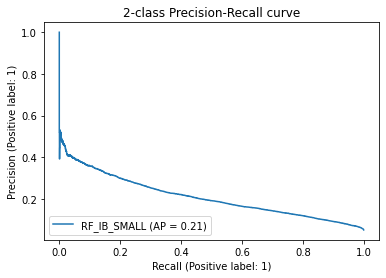

In [16]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf_big, X_test_big, y_test_big, name="RF_IB_SMALL"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

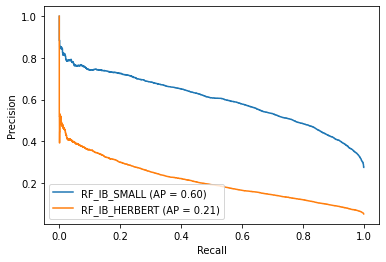

In [17]:
PrecisionRecallDisplay.from_estimator(
    clf_small, X_test_small, y_test_small, name="RF_IB_SMALL", ax=plt.gca()
)

PrecisionRecallDisplay.from_estimator(
    clf_big, X_test_big, y_test_big, name="RF_IB_HERBERT", ax=plt.gca()
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("rand_forest_prec_rec_curve.png", bbox_inches='tight')


Text(0.5, 0, 'Recall')

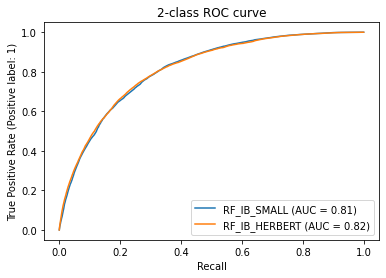

In [297]:
RocCurveDisplay.from_estimator(
    clf_small, X_test_small, y_test_small, name="RF_IB_SMALL", ax=plt.gca()
)

RocCurveDisplay.from_estimator(
    clf_big, X_test_big, y_test_big, name="RF_IB_HERBERT", ax=plt.gca()
)
plt.title('2-class ROC curve')

In [94]:
clf_small.feature_importances_

array([2.13640718e-01, 1.72848232e-01, 1.96286573e-02, 5.63821385e-03,
       3.57416964e-01, 5.11391490e-03, 4.88690024e-03, 4.51241072e-02,
       1.14519507e-01, 1.55502903e-02, 1.22776594e-02, 3.32263953e-02,
       8.28682242e-05, 4.55718692e-05])

In [95]:
clf_small.feature_names_in_

array(['hour_cos', 'hour_sin', 'month_cos', 'month_sin',
       'sun_elevation_angle', 'prec_duration', 'prec_height',
       'temperature', 'humidity', 'visibility', 'width', 'length',
       'year_2018', 'year_2019'], dtype=object)

In [18]:
forest_importances = pd.Series(clf_big.feature_importances_, index=clf_big.feature_names_in_)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = clf_big.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_big.estimators_], axis=0)
elapsed_time = time.time() - start_time


Text(0, 0.5, 'Mean decrease in impurity')

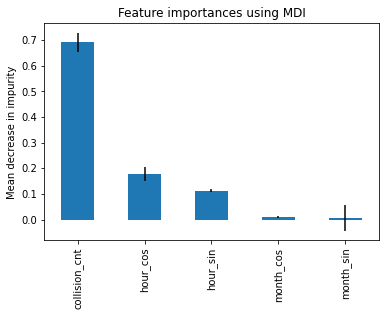

In [20]:
fig, ax = plt.subplots()
forest_importances.sort_values(axis=0, ascending=False).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [280]:
fig.savefig("feature_importance_hebert.png",bbox_inches='tight')

In [285]:
model2 = LogisticRegression(solver='liblinear', C=10, random_state=0).fit(X_train_big, y_train_big)

In [290]:
model2_pred = model2.predict(X_test_big)

In [294]:
metrics.roc_auc_score(y_test_big, model2.decision_function(X_test_big))

0.8049879840808768

In [56]:
## RANDOM PARAMETER GRID SEARCH
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [58]:
rf_random = RandomizedSearchCV(estimator = clf_small, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [59]:
rf_random.fit(X_train_small,y_train_small)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=17,
                                                    max_leaf_nodes=32,
                                                    min_samples_leaf=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
 

In [60]:
rf_random.best_params_

{'n_estimators': 116,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}